In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Homework 7

## Problem 1: The Iris Dataset

load the iris dataset

In [5]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #show first 5 rows

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Cluster the flowers using k-means and hierarchical clustering, and ensure that you have a good number of clusters (using the "elbow" method, for example). 
Compare the results obtained by the two methods.

In [7]:
X = iris_data.to_numpy()
X = X[:,:-1].astype('float32')

### k-means

In [21]:
'our k-means function'
def k_means(X,k,max_it=1000000):   
    it = 0 
    m,n = X.shape #dataset size, number of features
    repeat = True 
    'random initialization of clusters'
    clusters = np.random.randint(k,size=len(X)) # random assignment
    'means initialization'
    means = np.zeros((k,n))
    while repeat and it<=max_it: # repeat until clusters do not change or iterations > max_it
        it = it + 1
        'step 1: update means'
        for i in range(k):
            if len(X[clusters==i])!=0:
                means[i] = np.mean(X[clusters==i],axis=0)
            else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
                idx = np.random.randint(m)
                means[i] = X[idx]
        'step 2: update clusters'
        new_clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)        
        'check whether clusters and new_clusters are equal or not'
        if sum(clusters!=new_clusters)==0:
            repeat = False
        clusters = new_clusters
    return clusters, means

In [9]:
def inertia(X,k,clusters,means):
    m = X.shape[0] #dataset size
    inertia = 0
    for i in range(k): # iterate over clusters
        distances = np.square(np.linalg.norm(X[clusters==i]-means[i],axis=1)) # distances from points in cluster i to cluster i mean
        inertia = inertia + np.sum(distances)
    inertia = inertia/m
    return inertia

Let's run k-means for different values of k

In [12]:
largest_k = 10
k_list = [k+1 for k in range(largest_k)] # [1,2,3,...,largest_k]

inertia_list = []
for k in k_list:
    clusters, means = k_means(X,k)
    inertia_list.append(inertia(X,k,clusters,means))

Let's plot the inertia against the number of clusters

Text(0.5, 1.0, 'Inertia')

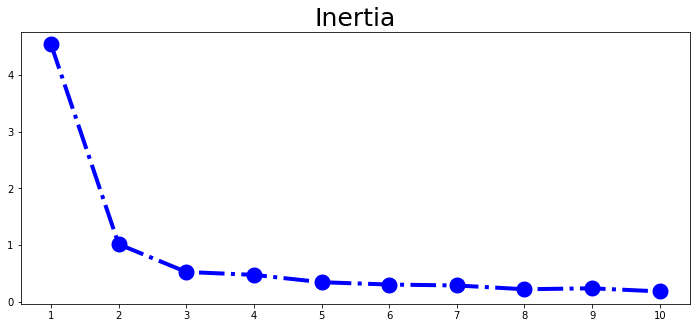

In [13]:
plt.figure(figsize=(12,5))
plt.plot(k_list,inertia_list,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Inertia',fontsize=25)

From the inertia curve, we see that $k=2$ or $k=3$ would be a good choice.

Let's cluster the dataset using k=3

In [22]:
k = 3
clusters, means = k_means(X,k)

In [23]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

Let's see the clusters

In [36]:
for i in range(k):
    print('Cluster '+str(i)+':')
    n = len(iris_data['species'][clusters==i])
    for j in range(n):
        print(iris_data['species'][clusters==i].iloc[j])

Cluster 0:
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Cluster 1:
Iris-versicolor


Notice that cluster 0 corresponds to the iris-versicolor class, cluster 1 corresponds to the iris-virginica class and cluster 2 corresponds to the iris-setosa class.

### hierarchical clustering

In [19]:
def hierarchical_clustering_with_inertia(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'cluster lengths initialization'
    cluster_len = np.ones(m) # all clusters have length one
    
    'cluster centers (means) initialization'
    means = X.copy()
    
    'inertia initialization'
    inertia = np.zeros(m-n_clusters+1)
    
    'hierarchical clustering iteration'
    it = 0
    while k>n_clusters:     
        it = it+1

        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
        
        'update cluster centers'
        means[i] = (cluster_len[i]*means[i]+cluster_len[j]*means[j])/(cluster_len[i]+cluster_len[j])
        means = np.delete(means,j,0)
        
        'update cluster lengths'
        cluster_len[i] = cluster_len[i]+cluster_len[j]
        cluster_len = np.delete(cluster_len,j)
        
        'inertia'
        inertia[it] = np.sum([np.sum(np.square(np.linalg.norm(X[clusters==cluster]-means[cluster],axis=1)))
                                for cluster in range(k)])/m

    return clusters, inertia

In [20]:
clusters, inertia = hierarchical_clustering_with_inertia(X)

Text(0.5, 1.0, 'Inertia')

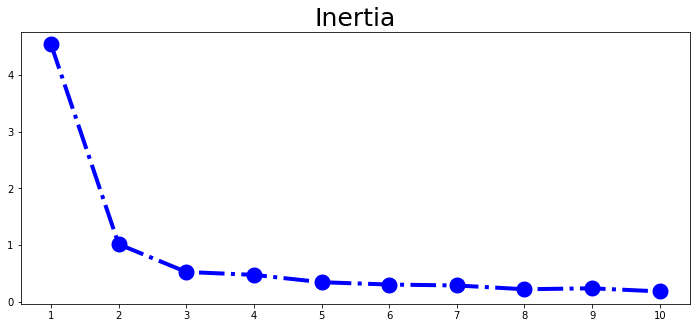

In [21]:
plt.figure(figsize=(12,5))
plt.plot(k_list,inertia_list,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Inertia',fontsize=25)

We reach the same conclusion, $𝑘=2$  or $𝑘=3$ would be a good choice

In [42]:
k = 3
clusters, inertia = hierarchical_clustering_with_inertia(X,k)

In [43]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's see the clusters

In [39]:
for i in range(k):
    print('Cluster '+str(i)+':')
    n = len(iris_data['species'][clusters==i])
    for j in range(n):
        print(iris_data['species'][clusters==i].iloc[j])

Cluster 0:
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Cluster 1:
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versi

Notice that hierarchical clustering is not able to split the iris-virginica and iris-versicolor classes into two separate clusters.

## Problem 2: Clustering for Color Segmentation

*Image segmentation* is the task of partitioning an image into multiple segments. 
In *color segmentation*, all pixels that are part of the same segments get assigned to the same color.

Load the ladybug image:

In [15]:
from matplotlib.image import imread
url = 'https://raw.githubusercontent.com/um-perez-alvaro/clustering/master/ladybug.png'
image = imread(url)

The image is represented as a 3D array

In [16]:
image.shape

(533, 800, 3)

The first dimension's size is the height; the second is the width; and the third is the number of color channels, in this case red, green and blue (RGB)

(-0.5, 799.5, 532.5, -0.5)

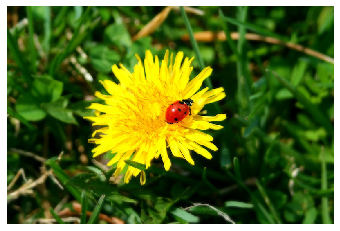

In [17]:
plt.imshow(image)
plt.axis('off')

The following code reshapes the array to get a long list of RGB colors (The resulting matrix $X$ has one row for each pixel)

In [18]:
X = image.reshape(-1,3)
X.shape

(426400, 3)

Cluster the pixels (i.e., the rows of $X$) using the k-means algorithm.
Next, replace each pixel (i.e., each row of $X$) by its cluster mean. 
Plot the resulting image for k=2, 4, 6, 8, 10 and 12. 

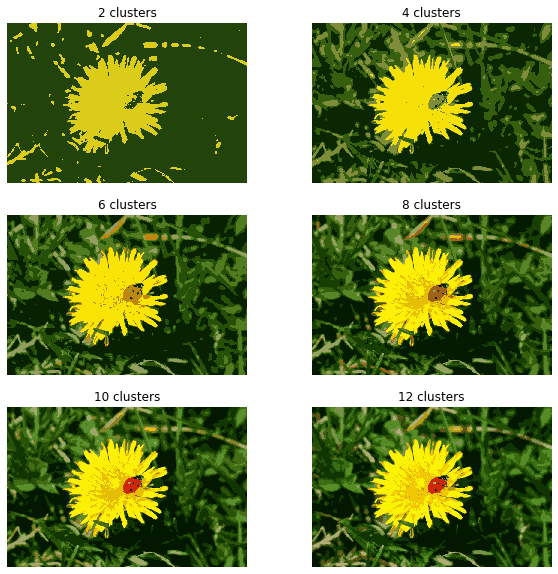

In [46]:
k_list = [2,4,6,8,10,12]
#k_list = [2]
i = 0
plt.figure(figsize=(10,10))
plt.tight_layout()
for k in k_list:
    i = i+1
    # k-means
    clusters, means = k_means(X,k)
    # replace each pixel by its cluster mean
    X_segmented = np.zeros(X.shape)
    for j in range(k):
        X_segmented[clusters==j] = means[j]
    image_segmented = X_segmented.reshape(533, 800, 3)
    plt.subplot(3,2,i)
    plt.imshow(image_segmented)
    plt.axis('off')
    plt.title(str(k)+' clusters')    

## Problem 3: the Olivetti Faces Dataset

The Olivetti faces dataset contains 400 grayscale 64 × 64 pixel images of faces. 
Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each).

In [47]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
images, labels = data.images, data.target

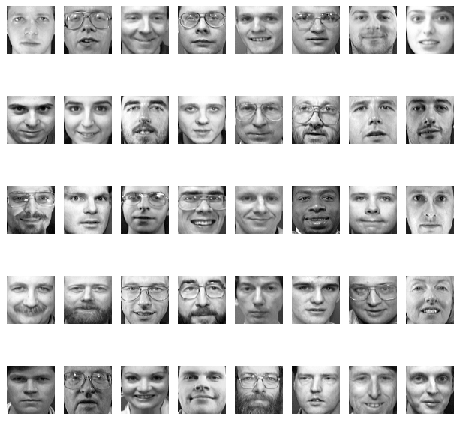

In [48]:
plt.figure(figsize=(8,8))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.imshow(images[i*10],cmap='gray')
    plt.axis('off')

Cluster the images using k-means or hierarchical clustering, and ensure that you have a good number of clusters using the silhouette score method.
 You might expect the optimal number of clusters to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

In [49]:
X = images.reshape(400,64*64)
X.shape

(400, 4096)

Let's use hierarchical clustering

In [50]:
'our three hierarchical clustering functions'
def hierarchical_clustering(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'hierarchical clustering iteration'
    while k>n_clusters:     
        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
   
    return clusters

def hierarchical_clustering_with_inertia(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'cluster lengths initialization'
    cluster_len = np.ones(m) # all clusters have length one
    
    'cluster centers (means) initialization'
    means = X.copy()
    
    'inertia initialization'
    inertia = np.zeros(m-n_clusters+1)
    
    'hierarchical clustering iteration'
    it = 0
    while k>n_clusters:     
        it = it+1

        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
        
        'update cluster centers'
        means[i] = (cluster_len[i]*means[i]+cluster_len[j]*means[j])/(cluster_len[i]+cluster_len[j])
        means = np.delete(means,j,0)
        
        'update cluster lengths'
        cluster_len[i] = cluster_len[i]+cluster_len[j]
        cluster_len = np.delete(cluster_len,j)
        
        'inertia'
        inertia[it] = np.sum([np.sum(np.square(np.linalg.norm(X[clusters==cluster]-means[cluster],axis=1)))
                                for cluster in range(k)])/m

    return clusters, inertia

def hierarchical_clustering_with_s_score(X,n_clusters=1):   
    'it also returns the silhouette scores'
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    'distance between points'
    d = distance_clusters.copy()
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'cluster lengths initialization'
    cluster_len = np.ones(m) # all clusters have length one
    
    's_scores initialization'
    s_scores = np.zeros(m-n_clusters+1)
    
    'hierarchical clustering iteration'
    it = 0
    while k>n_clusters:     
        it = it+1

        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
        
        'update cluster lengths'
        cluster_len[i] = cluster_len[i]+cluster_len[j]
        cluster_len = np.delete(cluster_len,j)
        
        'silhouette coefficients'
        a = np.array([np.sum(d[clusters == clusters[i],i])/(cluster_len[clusters[i]]-1) 
                      if cluster_len[clusters[i]]>1 
                          else 0
                              for i in range(m)])
        if k!=1:
            b = np.array([np.min([np.mean(d[clusters == cluster,i]) for cluster in range(k) 
                                                                      if cluster != clusters[i]]) 
                                                                          for i in range(m)])
        else: #only one cluster
            b = np.zeros(m)
        s_coeff = np.array([(b[i]-a[i])/max(a[i],b[i]) if cluster_len[clusters[i]]>1
                                                            else 0
                                                                for i in range(m)]) # warning: it could happen that a=b=0
        s_scores[it] = np.mean(s_coeff)
    return clusters, s_scores

In [51]:
clusters, s_scores = hierarchical_clustering_with_s_score(X)

Text(0.5, 1.0, 'silhouette score')

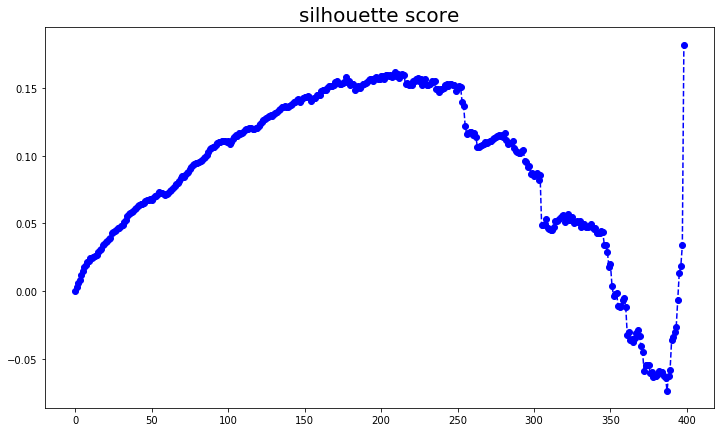

In [53]:
plt.figure(figsize=(12,7))
plt.plot(s_scores[:-1],'bo--')
plt.title('silhouette score', fontsize=20)

The optimal number of clusters is not clear on this silhouette score diagram, so let's take k=150.

In [54]:
k_best = 150
clusters = hierarchical_clustering(X,k_best)

Visualize the clusters: do you see similar faces in each cluster?

Cluster 0


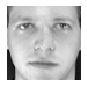

Cluster 1


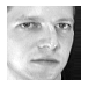

Cluster 2


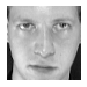

Cluster 3


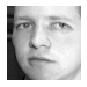

Cluster 4


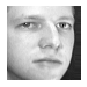

Cluster 5


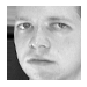

Cluster 6


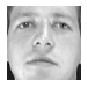

Cluster 7


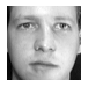

Cluster 8


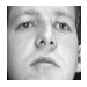

Cluster 9


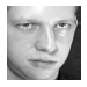

Cluster 10


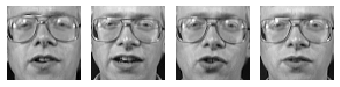

Cluster 11


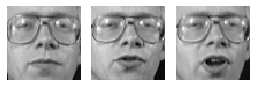

Cluster 12


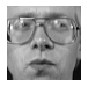

Cluster 13


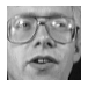

Cluster 14


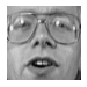

Cluster 15


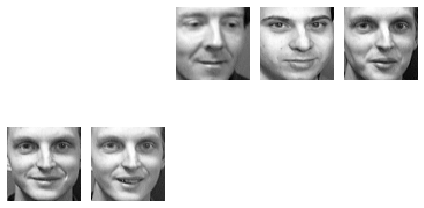

Cluster 16


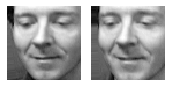

Cluster 17


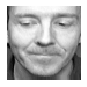

Cluster 18


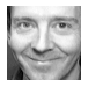

Cluster 19


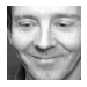

Cluster 20


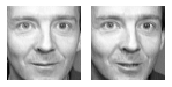

Cluster 21


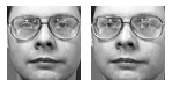

Cluster 22


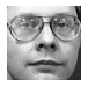

Cluster 23


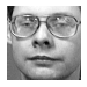

Cluster 24


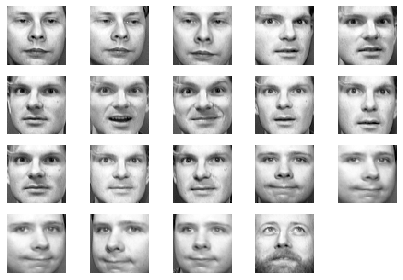

Cluster 25


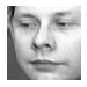

Cluster 26


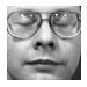

Cluster 27


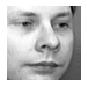

Cluster 28


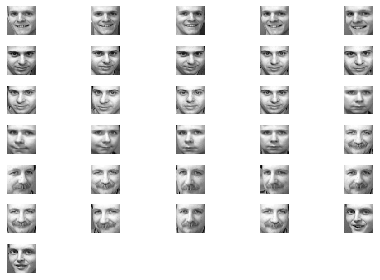

Cluster 29


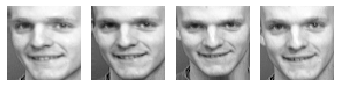

Cluster 30


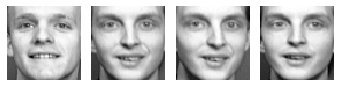

Cluster 31


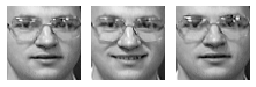

Cluster 32


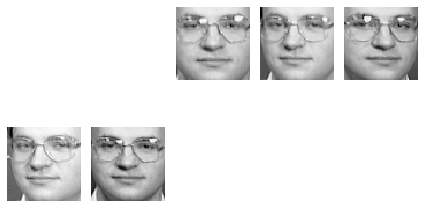

Cluster 33


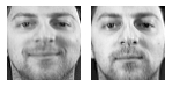

Cluster 34


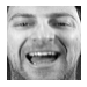

Cluster 35


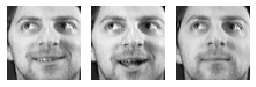

Cluster 36


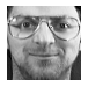

Cluster 37


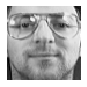

Cluster 38


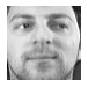

Cluster 39


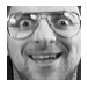

Cluster 40


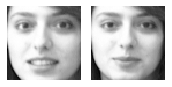

Cluster 41


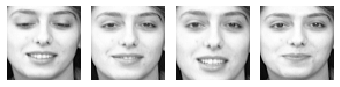

Cluster 42


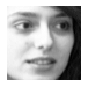

Cluster 43


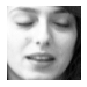

Cluster 44


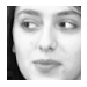

Cluster 45


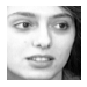

Cluster 46


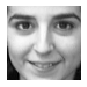

Cluster 47


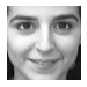

Cluster 48


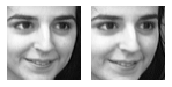

Cluster 49


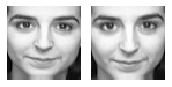

Cluster 50


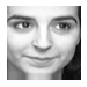

Cluster 51


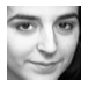

Cluster 52


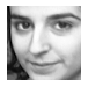

Cluster 53


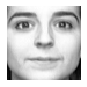

Cluster 54


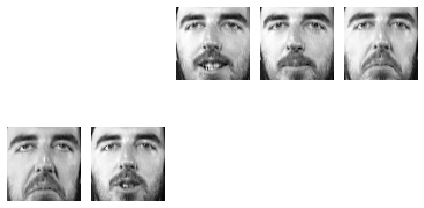

Cluster 55


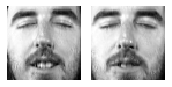

Cluster 56


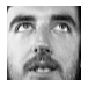

Cluster 57


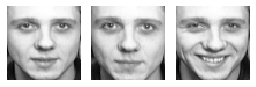

Cluster 58


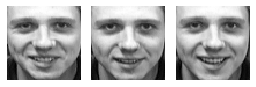

Cluster 59


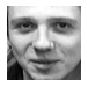

Cluster 60


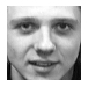

Cluster 61


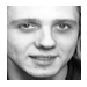

Cluster 62


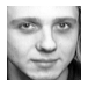

Cluster 63


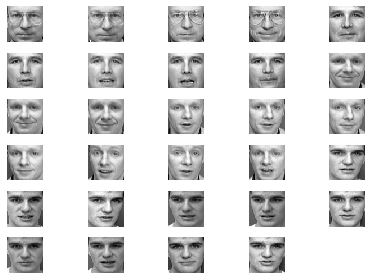

Cluster 64


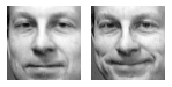

Cluster 65


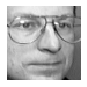

Cluster 66


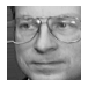

Cluster 67


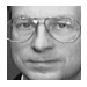

Cluster 68


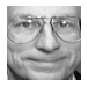

Cluster 69


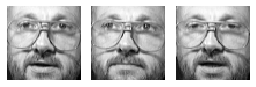

Cluster 70


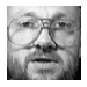

Cluster 71


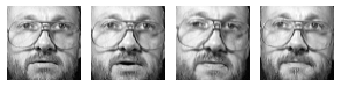

Cluster 72


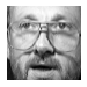

Cluster 73


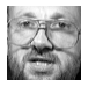

Cluster 74


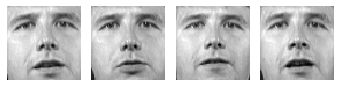

Cluster 75


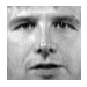

Cluster 76


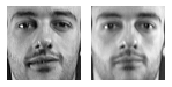

Cluster 77


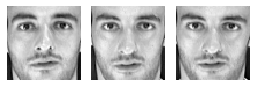

Cluster 78


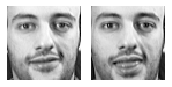

Cluster 79


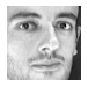

Cluster 80


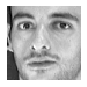

Cluster 81


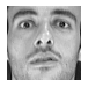

Cluster 82


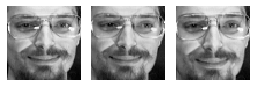

Cluster 83


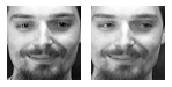

Cluster 84


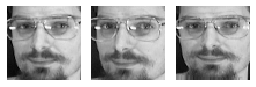

Cluster 85


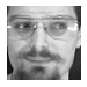

Cluster 86


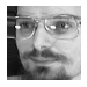

Cluster 87


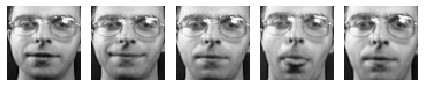

Cluster 88


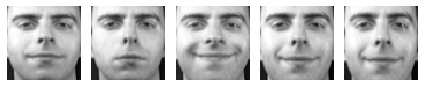

Cluster 89


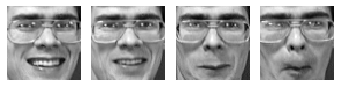

Cluster 90


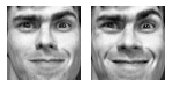

Cluster 91


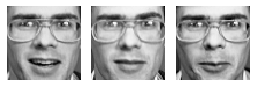

Cluster 92


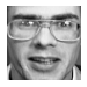

Cluster 93


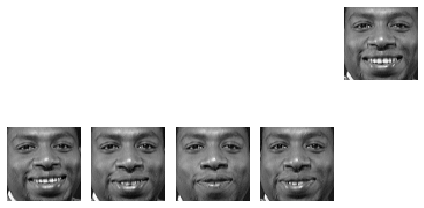

Cluster 94


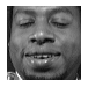

Cluster 95


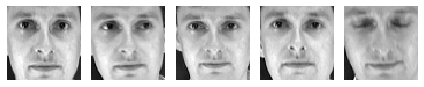

Cluster 96


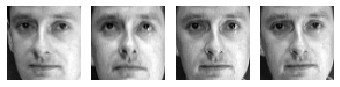

Cluster 97


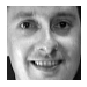

Cluster 98


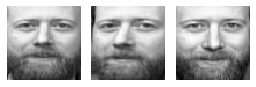

Cluster 99


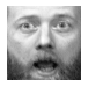

Cluster 100


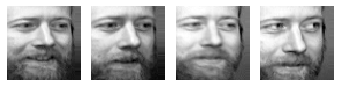

Cluster 101


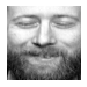

Cluster 102


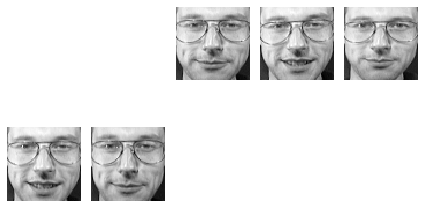

Cluster 103


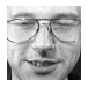

Cluster 104


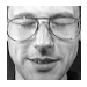

Cluster 105


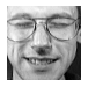

Cluster 106


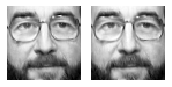

Cluster 107


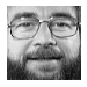

Cluster 108


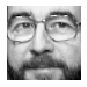

Cluster 109


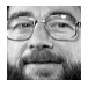

Cluster 110


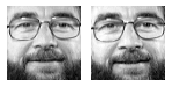

Cluster 111


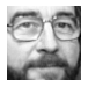

Cluster 112


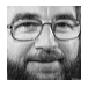

Cluster 113


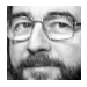

Cluster 114


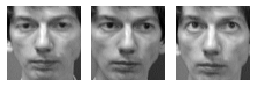

Cluster 115


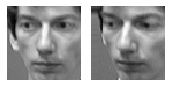

Cluster 116


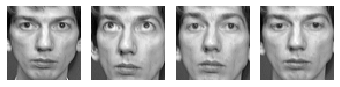

Cluster 117


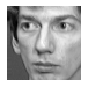

Cluster 118


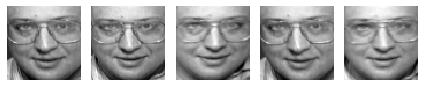

Cluster 119


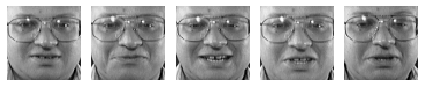

Cluster 120


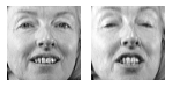

Cluster 121


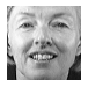

Cluster 122


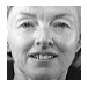

Cluster 123


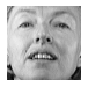

Cluster 124


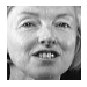

Cluster 125


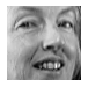

Cluster 126


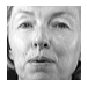

Cluster 127


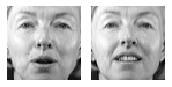

Cluster 128


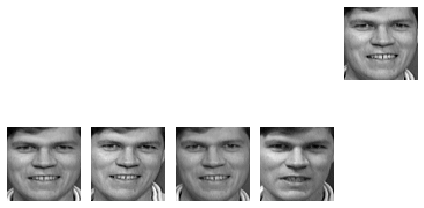

Cluster 129


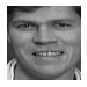

Cluster 130


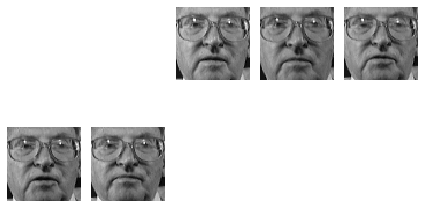

Cluster 131


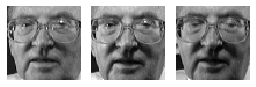

Cluster 132


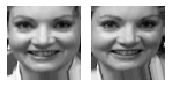

Cluster 133


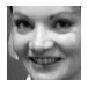

Cluster 134


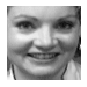

Cluster 135


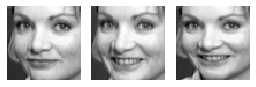

Cluster 136


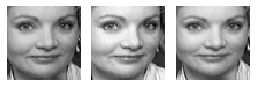

Cluster 137


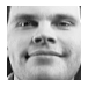

Cluster 138


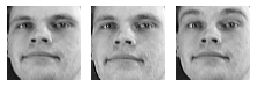

Cluster 139


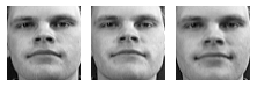

Cluster 140


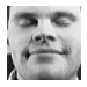

Cluster 141


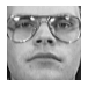

Cluster 142


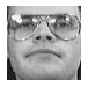

Cluster 143


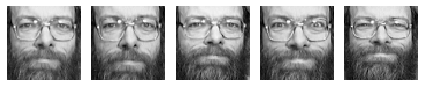

Cluster 144


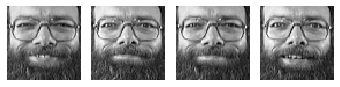

Cluster 145


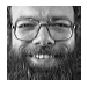

Cluster 146


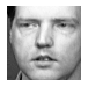

Cluster 147


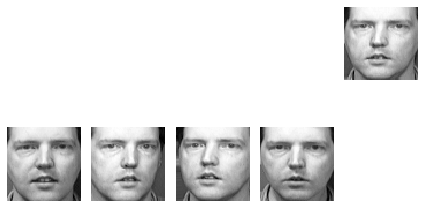

Cluster 148


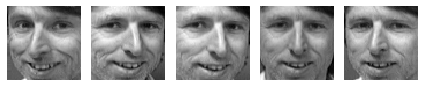

Cluster 149


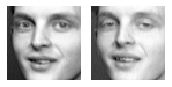

In [55]:
for i in range(k_best):
    print("Cluster", i)
    n_faces = sum(clusters==i)
    n_cols = 5
    n_rows = (n_faces - 1) // n_cols + 1
    cluster_faces = X[clusters==i]
    #plt.figure(figsize=(10,10))
    for j in range(n_faces):
        face = cluster_faces[j].reshape(64,64)
        plt.subplot(n_rows, n_cols,j+1)
        plt.imshow(face,cmap='gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

## Problem 4: Playing with Spectral Clustering

Use spectral clustering to find the two clusters in the following datasets.

In [59]:
import scipy
def Laplacian_matrix(X,sigma):
    
    'dataset size and number of features'
    m,n=X.shape
    
    'affinity matrix'
    A = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            A[i,j] = np.linalg.norm(X[i]-X[j])
    A = np.exp(-A/(2*sigma**2))
    
    'degree matrix'
    D = np.sum(A,axis=1)
    
    'return Laplacian matrix'
    return ((A/np.sqrt(D)).T/np.sqrt(D)).T

def spectral_clustering(X,k,sigma):
    
    'form Laplacian matrix'
    L = Laplacian_matrix(X,sigma=sigma)
    
    'find k largest eigenvectors'
    _,V = scipy.sparse.linalg.eigs(L, k=2,which='LM')
    
    'normalize rows of V'
    V = V/np.linalg.norm(V,axis=1,keepdims=True)
    V = np.real(V) # remove the imaginary parts (which are all equal to 0)
    
    'apply k-means to rows of V'
    clusters,_ = k_means(V,k)
    
    return clusters

**Dataset 1: Eye of Sauron**

Text(0.5, 1.0, 'Eye of Sauron')

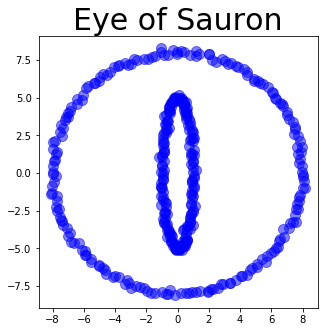

In [57]:
X = np.zeros((400,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)
# cluster 2:
X[200:400,0] = 1*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 5*np.cos(theta)+0.1*np.random.randn(200)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5,markersize=10)
plt.title('Eye of Sauron',fontsize=30)

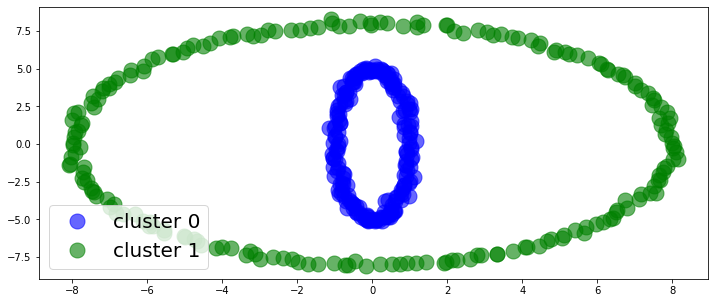

In [66]:
"parameters"
k = 2
sigma = .5
'spectral clustering'
clusters = spectral_clustering(X,k,sigma)
'plot clusters'
colors = ['blue','green']
plt.figure(figsize=(12,5))
k=2
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6,markersize=15)
    plt.legend(fontsize=20, loc='lower left')

**Dataset 2: connected circles**

Text(0.5, 1.0, 'Connected circles')

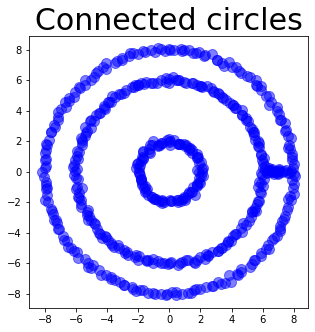

In [67]:
X = np.zeros((525,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)

X[200:400,0] = 6*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 6*np.cos(theta)+0.1*np.random.randn(200)

X[400:425,0] = 6 + 2*np.random.rand(25)
X[400:425,1] = 0.1*np.random.randn(25)

# cluster 2:
theta = np.linspace(0,2*np.pi,100)
X[425:525,0] = 2*np.sin(theta)+0.1*np.random.randn(100)
X[425:525,1] = 2*np.cos(theta)+0.1*np.random.randn(100)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5,markersize=10)
plt.title('Connected circles',fontsize=30)

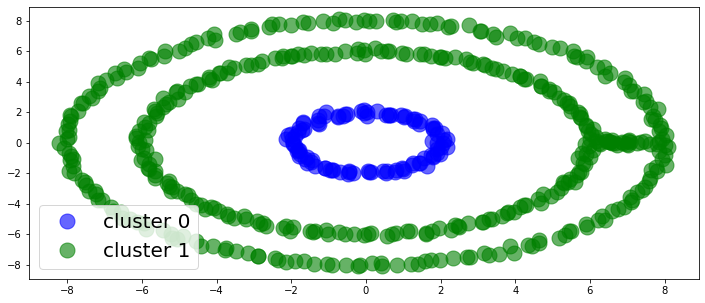

In [68]:
"parameters"
k = 2
sigma = .5
'spectral clustering'
clusters = spectral_clustering(X,k,sigma)
'plot clusters'
colors = ['blue','green']
plt.figure(figsize=(12,5))
k=2
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6,markersize=15)
    plt.legend(fontsize=20, loc='lower left')

**Dataset 3: interlocked rings (3D)**

In [69]:
from mpl_toolkits.mplot3d import Axes3D 
#the next line will allow you to rotate the 3d graph
%matplotlib notebook 

<IPython.core.display.Javascript object>


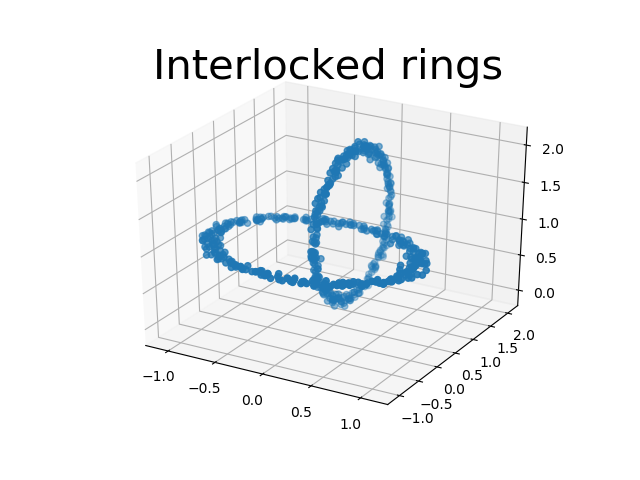

Text(0.5, 0.92, 'Interlocked rings')

In [70]:
X = np.zeros((600,3))

# cluster 1:
theta = np.linspace(0,2*np.pi,300) 
X[0:300,0] = np.sin(theta)+0.05*np.random.randn(300)
X[0:300,1] = np.cos(theta)+0.05*np.random.randn(300)
X[0:300,2] = np.ones(300)

# cluster 2:
X[300:600,0] = np.zeros(300)
X[300:600,1] = np.sin(theta)+1+0.05*np.random.randn(300)
X[300:600,2] = np.cos(theta)+1+0.05*np.random.randn(300)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.title('Interlocked rings',fontsize=30)

<IPython.core.display.Javascript object>


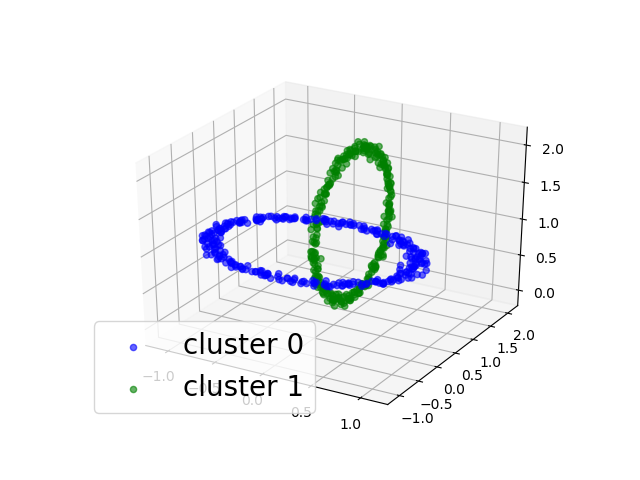

In [80]:
"parameters"
k = 2
sigma = 0.25
'spectral clustering'
clusters = spectral_clustering(X,k,sigma)
'plot clusters'
colors = ['blue','green']
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(k):   
    ax.scatter(X[clusters==i,0],X[clusters==i,1],X[clusters==i,2],color=colors[i],label = 'cluster '+str(i),alpha=0.6)
    ax.legend(fontsize=20, loc='lower left')

## Problem 5: Greedy Initialization of k-means

Consider the following initialization method which we denote as the *greedy* initialization method:

1. For the first cluster center, pick one of the dataset points at random.

2. Pick each remaining cluster center as the dataset point as far from the previous centers as possible.

Consider the following dataset:

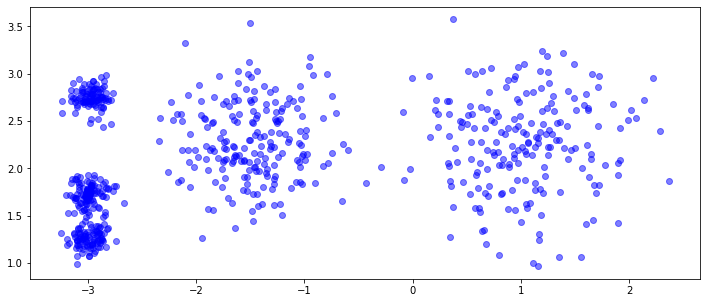

In [2]:
X = np.zeros((700,2))

X[:100] = 0.1*np.random.randn(100,2) + [-3,1.25] # blob 1
X[100:200] = 0.1*np.random.randn(100,2) + [-3,1.75] # blob 2
X[200:300] = 0.1*np.random.randn(100,2) + [-3,2.75] # blob 3
X[300:500] = 0.4*np.random.randn(200,2) + [-1.5,2.25] # blob 4
X[500:700] = 0.5*np.random.randn(200,2) + [1,2.25] # blob 5

plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5)

Plot the k-means' initial clusters (with $k=5$) if:

1. the initial cluster's centers are randomly chosen from the dataset points

In [11]:
'random initialization'
k = 5
idxs = np.random.choice(np.arange(700), size=5, replace=False)
means = X[idxs]
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

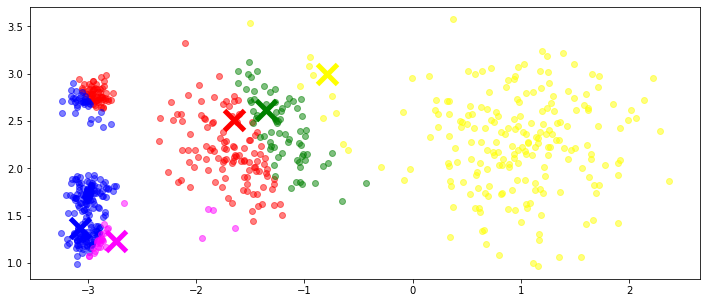

In [12]:
plt.figure(figsize=(12,5))
colors = ['red','blue','green','magenta','yellow']
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    #plt.legend(fontsize=20,loc='lower right')

2. the initial cluster's centers are chosen using the greedy initialization

In [ ]:
'greedy initialization'
m,n = X.shape
k = 5 # number of clusters
means = np.zeros((k,n))
'choose first center at random'
idx = np.random.randint(m)
means[0] = X[idx]
'choose the other centers'
for center in range(1,k):
    idx = np.argmax([np.min([np.linalg.norm(X[i]-means[j]) for j in range(center)]) for i in range(m)])
    means[center] = X[idx]
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

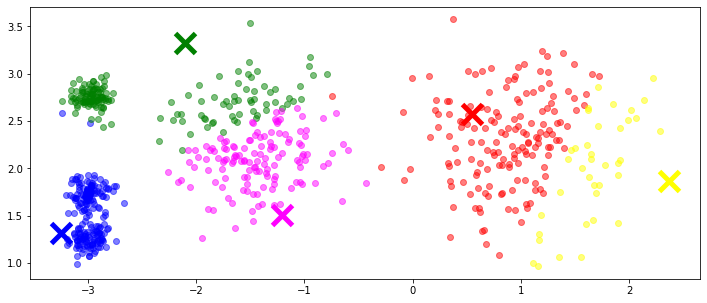

In [13]:
plt.figure(figsize=(12,5))
colors = ['red','blue','green','magenta','yellow']
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    #plt.legend(fontsize=20,loc='lower right')